<a href="https://colab.research.google.com/github/rajakumar05032000/Stock-price-prediction/blob/main/CryptoV2_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as pyplt

In [ ]:
from tvDatafeed import TvDatafeed,Interval
tv=TvDatafeed(auto_login=False, chromedriver_path='/usr/bin/chromedriver')
data = tv.get_hist('BTCUSDT','BINANCE',interval=Interval.in_5_minute,n_bars=100000)
data.to_csv('btc_5min_new.csv',index=False)

In [ ]:
data.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2021-11-23 06:50:00,BINANCE:BTCUSDT,56500.00,56783.96,56459.76,56750.00,108.59731
2021-11-23 06:55:00,BINANCE:BTCUSDT,56749.99,56989.17,56672.11,56741.21,267.90859
2021-11-23 07:00:00,BINANCE:BTCUSDT,56741.21,56822.33,56557.93,56561.69,114.76589
2021-11-23 07:05:00,BINANCE:BTCUSDT,56561.68,56610.99,56500.00,56532.25,214.08150
2021-11-23 07:10:00,BINANCE:BTCUSDT,56532.25,56636.54,56437.65,56603.10,90.03206


In [ ]:
df_high=data.reset_index()['high']
df_open=data.reset_index()['open']
df_close=data.reset_index()['close']
df_volume=data.reset_index()['volume']
df_low=data.reset_index()['low']

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler_high = MinMaxScaler(feature_range=(0,1))
scaler_open = MinMaxScaler(feature_range=(0,1))
scaler_volume = MinMaxScaler(feature_range=(0,1))
scaler_low = MinMaxScaler(feature_range=(0,1))
scaler_close = MinMaxScaler(feature_range=(0,1))

df_high = scaler_high.fit_transform(np.array(df_high).reshape(-1,1))
df_open = scaler_open.fit_transform(np.array(df_open).reshape(-1,1))
df_volume = scaler_volume.fit_transform(np.array(df_volume).reshape(-1,1))
df_low = scaler_low.fit_transform(np.array(df_low).reshape(-1,1))
df_close = scaler_close.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
training_size=int(len(df_high)*0.80)
test_size=len(df_high)-training_size


train_data_high,test_data_high = df_high[0:training_size,:],df_high[training_size:len(df_high),:1]
train_data_open,test_data_open = df_open[0:training_size,:],df_open[training_size:len(df_open),:1]
train_data_close,test_data_close = df_close[0:training_size,:],df_close[training_size:len(df_close),:1]
train_data_volume,test_data_volume = df_volume[0:training_size,:],df_volume[training_size:len(df_volume),:1]
train_data_low,test_data_low = df_low[0:training_size,:],df_low[training_size:len(df_low),:1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [ ]:

time_step = 100

X_train_high, y_train_high = create_dataset(train_data_high, time_step)
X_test_high, y_test_high = create_dataset(test_data_high, time_step)

X_train_open, y_train_open = create_dataset(train_data_open, time_step)
X_test_open, y_test_open = create_dataset(test_data_open, time_step)

X_train_close, y_train_close = create_dataset(train_data_close, time_step)
X_test_close, y_test_close = create_dataset(test_data_close, time_step)

X_train_volume, y_train_volume = create_dataset(train_data_volume, time_step)
X_test_volume, y_test_volume = create_dataset(test_data_volume, time_step)

X_train_low, y_train_low = create_dataset(train_data_low, time_step)
X_test_low, y_test_low = create_dataset(test_data_low, time_step)

In [ ]:
X_test_close = X_test_close.reshape(X_test_close.shape[0],X_test_close.shape[1] , 1)

###### newly added ##################################
X_test_open = X_test_open.reshape(X_test_open.shape[0],X_test_open.shape[1] , 1)
X_test_high = X_test_high.reshape(X_test_high.shape[0],X_test_high.shape[1] , 1)
X_test_volume = X_test_volume.reshape(X_test_volume.shape[0],X_test_volume.shape[1] , 1)
X_test_low = X_test_low.reshape(X_test_low.shape[0],X_test_low.shape[1] , 1)


######################################################
X_train_high = X_train_high.reshape(X_train_high.shape[0],X_train_high.shape[1] , 1)
X_train_open = X_train_open.reshape(X_train_open.shape[0],X_train_open.shape[1] , 1)
X_train_close = X_train_close.reshape(X_train_close.shape[0],X_train_close.shape[1] , 1)
X_train_volume = X_train_volume.reshape(X_train_volume.shape[0],X_train_volume.shape[1] , 1)
X_train_low = X_train_low.reshape(X_train_low.shape[0],X_train_low.shape[1] , 1)


In [ ]:
X_train_close[0].shape

(100, 1)

In [ ]:
from keras.layers import Bidirectional,GlobalMaxPool1D,Conv1D,MaxPool1D
from keras.layers import LSTM,Input,Dense,Dropout,Activation,GRU,Concatenate
from keras.models import Model


# inp_high = Input(shape=(X_train_close[0].shape))
# a = LSTM(50,return_sequences=True)(inp_high)#50 
# a = LSTM(25,return_sequences=True)(a)#25  
# a = LSTM(20)(a)#20
# a = Dense(1)(a)#1

inp_open = Input(shape=(X_train_close[0].shape))
b = Bidirectional(LSTM(50,return_sequences=True))(inp_open)
b = Bidirectional(LSTM(25,return_sequences=True))(b)
b = Bidirectional(LSTM(20))(b)
b = Dense(1)(b)

inp_close = Input(shape=(X_train_close[0].shape))
c = Bidirectional(LSTM(150,return_sequences=True))(inp_close)
c = Bidirectional(LSTM(50,return_sequences=True))(c)
c = Bidirectional(LSTM(30))(c)
c = Dense(1)(c)

inp_volume = Input(shape=(X_train_close[0].shape))
d = Bidirectional(LSTM(50,return_sequences=True))(inp_volume)
d = Bidirectional(LSTM(25,return_sequences=True))(d)
d = Bidirectional(LSTM(20))(d)
d = Dense(1)(d)

# inp_low = Input(shape=(X_train_close[0].shape))
# e = LSTM(50,return_sequences=True)(inp_low)
# e = LSTM(25,return_sequences=True)(e)
# e = LSTM(20)(e)
# e = Dense(1)(e)



conc= Concatenate()([b,c,d])
out=Dense(1)(conc)


#model = Model([inp_open,inp_close,inp_volume], out)
model = Model(inp_close,c)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='best_5min.hdf5', 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [ ]:
model.fit(X_train_close,y_train_close,validation_data=(X_test_close,y_test_close),epochs=250,batch_size=64,callbacks=callbacks,verbose=1)

Epoch 1/250
61/61 [==============================] - ETA: 0s - loss: 0.0215
Epoch 00001: val_loss improved from inf to 0.00082, saving model to best_5min.hdf5
61/61 [==============================] - 46s 604ms/step - loss: 0.0215 - val_loss: 8.1560e-04
Epoch 2/250
61/61 [==============================] - ETA: 0s - loss: 0.0018
Epoch 00002: val_loss improved from 0.00082 to 0.00034, saving model to best_5min.hdf5
61/61 [==============================] - 36s 583ms/step - loss: 0.0018 - val_loss: 3.4110e-04
Epoch 3/250
61/61 [==============================] - ETA: 0s - loss: 6.2919e-04
Epoch 00003: val_loss improved from 0.00034 to 0.00028, saving model to best_5min.hdf5
61/61 [==============================] - 35s 578ms/step - loss: 6.2919e-04 - val_loss: 2.7772e-04
Epoch 4/250
61/61 [==============================] - ETA: 0s - loss: 5.2066e-04
Epoch 00004: val_loss improved from 0.00028 to 0.00026, saving model to best_5min.hdf5
61/61 [==============================] - 35s 574ms/step - 

Epoch 34/250
61/61 [==============================] - ETA: 0s - loss: 2.0766e-04
Epoch 00034: val_loss did not improve from 0.00012
61/61 [==============================] - 34s 563ms/step - loss: 2.0766e-04 - val_loss: 1.2556e-04
Epoch 35/250
61/61 [==============================] - ETA: 0s - loss: 2.1448e-04
Epoch 00035: val_loss improved from 0.00012 to 0.00012, saving model to best_5min.hdf5
61/61 [==============================] - 34s 565ms/step - loss: 2.1448e-04 - val_loss: 1.1711e-04
Epoch 36/250
61/61 [==============================] - ETA: 0s - loss: 2.6707e-04
Epoch 00036: val_loss did not improve from 0.00012
61/61 [==============================] - 34s 563ms/step - loss: 2.6707e-04 - val_loss: 1.8053e-04
Epoch 37/250
61/61 [==============================] - ETA: 0s - loss: 3.3298e-04
Epoch 00037: val_loss did not improve from 0.00012
61/61 [==============================] - 34s 562ms/step - loss: 3.3298e-04 - val_loss: 1.2243e-04
Epoch 38/250
61/61 [========================

Epoch 69/250
61/61 [==============================] - ETA: 0s - loss: 1.5088e-04
Epoch 00069: val_loss did not improve from 0.00009
61/61 [==============================] - 35s 578ms/step - loss: 1.5088e-04 - val_loss: 1.0786e-04
Epoch 70/250
61/61 [==============================] - ETA: 0s - loss: 1.7500e-04
Epoch 00070: val_loss did not improve from 0.00009
61/61 [==============================] - 36s 596ms/step - loss: 1.7500e-04 - val_loss: 1.1585e-04
Epoch 71/250
61/61 [==============================] - ETA: 0s - loss: 1.5801e-04
Epoch 00071: val_loss did not improve from 0.00009
61/61 [==============================] - 36s 583ms/step - loss: 1.5801e-04 - val_loss: 1.1095e-04
Epoch 72/250
61/61 [==============================] - ETA: 0s - loss: 1.6181e-04
Epoch 00072: val_loss improved from 0.00009 to 0.00009, saving model to best_5min.hdf5
61/61 [==============================] - 43s 708ms/step - loss: 1.6181e-04 - val_loss: 8.8745e-05
Epoch 73/250
61/61 [========================

Epoch 104/250
61/61 [==============================] - ETA: 0s - loss: 1.2266e-04
Epoch 00104: val_loss did not improve from 0.00007
61/61 [==============================] - 40s 661ms/step - loss: 1.2266e-04 - val_loss: 8.4065e-05
Epoch 105/250
61/61 [==============================] - ETA: 0s - loss: 1.3072e-04
Epoch 00105: val_loss did not improve from 0.00007
61/61 [==============================] - 41s 666ms/step - loss: 1.3072e-04 - val_loss: 8.5590e-05
Epoch 106/250
61/61 [==============================] - ETA: 0s - loss: 1.2765e-04
Epoch 00106: val_loss did not improve from 0.00007
61/61 [==============================] - 43s 702ms/step - loss: 1.2765e-04 - val_loss: 7.5564e-05
Epoch 107/250
61/61 [==============================] - ETA: 0s - loss: 1.2154e-04
Epoch 00107: val_loss did not improve from 0.00007
61/61 [==============================] - 37s 613ms/step - loss: 1.2154e-04 - val_loss: 1.1456e-04
Epoch 108/250
61/61 [==============================] - ETA: 0s - loss: 1.182

Epoch 139/250
61/61 [==============================] - ETA: 0s - loss: 1.0669e-04
Epoch 00139: val_loss did not improve from 0.00007
61/61 [==============================] - 36s 593ms/step - loss: 1.0669e-04 - val_loss: 1.4581e-04
Epoch 140/250
61/61 [==============================] - ETA: 0s - loss: 1.2696e-04
Epoch 00140: val_loss did not improve from 0.00007
61/61 [==============================] - 37s 604ms/step - loss: 1.2696e-04 - val_loss: 7.0518e-05
Epoch 141/250
61/61 [==============================] - ETA: 0s - loss: 1.1626e-04
Epoch 00141: val_loss did not improve from 0.00007
61/61 [==============================] - 41s 668ms/step - loss: 1.1626e-04 - val_loss: 1.0903e-04
Epoch 142/250
61/61 [==============================] - ETA: 0s - loss: 1.0849e-04
Epoch 00142: val_loss did not improve from 0.00007
61/61 [==============================] - 35s 570ms/step - loss: 1.0849e-04 - val_loss: 7.9594e-05
Epoch 143/250
61/61 [==============================] - ETA: 0s - loss: 1.295

Epoch 175/250
61/61 [==============================] - ETA: 0s - loss: 1.0841e-04
Epoch 00175: val_loss did not improve from 0.00007
61/61 [==============================] - 44s 724ms/step - loss: 1.0841e-04 - val_loss: 8.2287e-05
Epoch 176/250
61/61 [==============================] - ETA: 0s - loss: 1.1960e-04
Epoch 00176: val_loss did not improve from 0.00007
61/61 [==============================] - 44s 714ms/step - loss: 1.1960e-04 - val_loss: 1.1908e-04
Epoch 177/250
61/61 [==============================] - ETA: 0s - loss: 1.1383e-04
Epoch 00177: val_loss did not improve from 0.00007
61/61 [==============================] - 37s 610ms/step - loss: 1.1383e-04 - val_loss: 1.5109e-04
Epoch 178/250
61/61 [==============================] - ETA: 0s - loss: 1.1361e-04
Epoch 00178: val_loss did not improve from 0.00007
61/61 [==============================] - 45s 731ms/step - loss: 1.1361e-04 - val_loss: 8.1674e-05
Epoch 179/250
61/61 [==============================] - ETA: 0s - loss: 1.170

Epoch 211/250
61/61 [==============================] - ETA: 0s - loss: 1.1320e-04
Epoch 00211: val_loss did not improve from 0.00007
61/61 [==============================] - 35s 568ms/step - loss: 1.1320e-04 - val_loss: 9.0782e-05
Epoch 212/250
61/61 [==============================] - ETA: 0s - loss: 9.8639e-05
Epoch 00212: val_loss did not improve from 0.00007
61/61 [==============================] - 35s 567ms/step - loss: 9.8639e-05 - val_loss: 1.1636e-04
Epoch 213/250
61/61 [==============================] - ETA: 0s - loss: 1.0874e-04
Epoch 00213: val_loss did not improve from 0.00007
61/61 [==============================] - 35s 569ms/step - loss: 1.0874e-04 - val_loss: 7.7250e-05
Epoch 214/250
61/61 [==============================] - ETA: 0s - loss: 1.0464e-04
Epoch 00214: val_loss did not improve from 0.00007
61/61 [==============================] - 35s 567ms/step - loss: 1.0464e-04 - val_loss: 8.5782e-05
Epoch 215/250
61/61 [==============================] - ETA: 0s - loss: 9.891

Epoch 247/250
61/61 [==============================] - ETA: 0s - loss: 1.0390e-04
Epoch 00247: val_loss did not improve from 0.00007
61/61 [==============================] - 35s 567ms/step - loss: 1.0390e-04 - val_loss: 1.1186e-04
Epoch 248/250
61/61 [==============================] - ETA: 0s - loss: 1.0690e-04
Epoch 00248: val_loss did not improve from 0.00007
61/61 [==============================] - 34s 565ms/step - loss: 1.0690e-04 - val_loss: 1.0004e-04
Epoch 249/250
61/61 [==============================] - ETA: 0s - loss: 9.8358e-05
Epoch 00249: val_loss did not improve from 0.00007
61/61 [==============================] - 34s 565ms/step - loss: 9.8358e-05 - val_loss: 9.6534e-05
Epoch 250/250
61/61 [==============================] - ETA: 0s - loss: 1.1005e-04
Epoch 00250: val_loss did not improve from 0.00007
61/61 [==============================] - 35s 568ms/step - loss: 1.1005e-04 - val_loss: 1.0342e-04


In [ ]:
# import keras
# model = keras.models.load_model("/home/personal/Desktop/best_5min.hdf5")
train_predict=model.predict(X_train_close)
test_predict=model.predict(X_test_close)

In [ ]:
train_predict=scaler_close.inverse_transform(train_predict)
test_predict=scaler_close.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
y_train_close1 = y_train_close.reshape(-1,1)
y_train_close1 = scaler_close.inverse_transform(y_train_close1)
math.sqrt(mean_squared_error(y_train_close1,train_predict))
#187.74900342699905
#15.267288828570317

141.80497233226404

In [ ]:
y_test_close1 = y_test_close.reshape(-1,1)
y_test_close1 = scaler_close.inverse_transform(y_test_close1)
math.sqrt(mean_squared_error(y_test_close1,test_predict))
#182.76988389047486
#18.19369529558874

139.84743754633624

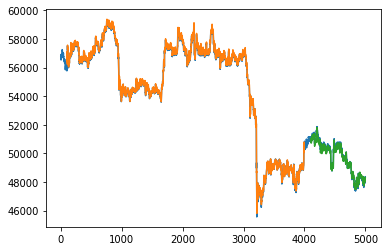

In [ ]:
import matplotlib.pyplot as plt 
look_back=100
trainPredictPlot = numpy.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler_close.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.gz')
#my_scaler = joblib.load('scaler.gz')

['scaler.gz']

In [ ]:
from tvDatafeed import TvDatafeed,Interval
import time
tv=TvDatafeed(auto_login=False, chromedriver_path='/usr/bin/chromedriver')
final_predictions = []
textfile = open("predictions_file.txt", "w")   
    

for i in range(15):
    btc_data = tv.get_hist('BTCUSDT','BINANCE',interval=Interval.in_5_minute,n_bars=101)
    btc_data.to_csv('btc_5min_new1.csv',index=False)

    pdf = pd.read_csv('btc_5min_new1.csv')
    pdf = pdf.head(100)
    pdf_high=pdf.reset_index()['high']
    pdf_open=pdf.reset_index()['open']
    pdf_close=pdf.reset_index()['close']
    pdf_volume=pdf.reset_index()['volume']
    pdf_low=pdf.reset_index()['low']
    pdf_high1, pdf_open1,pdf_close1,pdf_volume1,pdf_low1 = [], [],[],[],[]

    a = pdf_high[:]  
    pdf_high1.append(a)
    pdf_high1=numpy.array(pdf_high1)	

    a = pdf_open[:]  
    pdf_open1.append(a)
    pdf_open1=numpy.array(pdf_open1)	

    a = pdf_close[:]  
    pdf_close1.append(a)
    pdf_close1=numpy.array(pdf_close1)	

    a = pdf_volume[:]  
    pdf_volume1.append(a)
    pdf_volume1=numpy.array(pdf_volume1)	

    a = pdf_low[:]  
    pdf_low1.append(a)
    pdf_low1=numpy.array(pdf_low1)	

    pdf_high1 = scaler_high.fit_transform(np.array(pdf_high1).reshape(-1,1))
    pdf_open1 = scaler_open.fit_transform(np.array(pdf_open).reshape(-1,1))
    pdf_volume1 = scaler_volume.fit_transform(np.array(pdf_volume).reshape(-1,1))
    pdf_low1 = scaler_low.fit_transform(np.array(pdf_low).reshape(-1,1))
    pdf_close1 = scaler_close.fit_transform(np.array(pdf_close).reshape(-1,1))

    pdf_high1 = pdf_high1.reshape(1,100 , 1)
    pdf_open1 = pdf_open1.reshape(1,100, 1)
    pdf_close1 = pdf_close1.reshape(1,100, 1)
    pdf_volume1 = pdf_volume1.reshape(1,100, 1)
    pdf_low1 = pdf_low1.reshape(1,100, 1)

    ans = model.predict(pdf_close1)
    ans= ans.reshape(-1,1)
    ans = scaler_close.inverse_transform(ans)
    final_predictions.append(ans)
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    textfile.write(str(current_time) +"  "+str(ans)+ "\n")
    time.sleep(300)
    
textfile.close()

In [ ]:
# time:14.16

textfile = open("predictions_file.txt", "w")
for element in final_predictions:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
final_predictions

[array([[47982.527]], dtype=float32),
 array([[47828.613]], dtype=float32),
 array([[47786.125]], dtype=float32),
 array([[47796.543]], dtype=float32),
 array([[47536.19]], dtype=float32),
 array([[47571.977]], dtype=float32),
 array([[47741.45]], dtype=float32),
 array([[47776.26]], dtype=float32),
 array([[47517.98]], dtype=float32),
 array([[47631.508]], dtype=float32),
 array([[47795.637]], dtype=float32),
 array([[47770.625]], dtype=float32),
 array([[47581.98]], dtype=float32),
 array([[47656.176]], dtype=float32),
 array([[47643.96]], dtype=float32)]

In [ ]:
ans_final = []
for i in range(len(final_predictions)):
    ans_final.append(final_predictions[i][0])

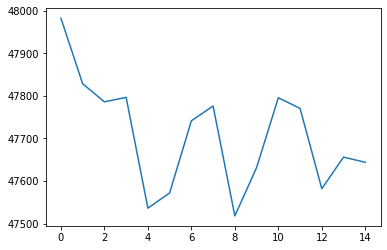

In [ ]:
plt.plot(ans_final)